# Loading data from "Benchmark dataset"

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
print(sys.executable)

/Users/arto/opt/anaconda3/envs/ds/bin/python


In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [6]:
PROJECT_ROOT_DIR = "/Users/arto/Dropbox/Data" #this is the working directory for the project

In [7]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
cd /Users/arto/Dropbox/Data/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training

/Users/arto/Dropbox/Data/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training


In [9]:
ls

Test/                                Train_Dst_NoAuction_ZScore_CF_5.txt
Train_Dst_NoAuction_ZScore_CF_1.txt  Train_Dst_NoAuction_ZScore_CF_6.txt
Train_Dst_NoAuction_ZScore_CF_2.txt  Train_Dst_NoAuction_ZScore_CF_7.txt
Train_Dst_NoAuction_ZScore_CF_3.txt  Train_Dst_NoAuction_ZScore_CF_8.txt
Train_Dst_NoAuction_ZScore_CF_4.txt  Train_Dst_NoAuction_ZScore_CF_9.txt


In [10]:
dataset = pd.read_csv('Train_Dst_NoAuction_ZScore_CF_1.txt', delim_whitespace=True, header = None)

### Comparison of auction vs. non-auction dataset

In [9]:
dataset = pd.read_csv('Train_Dst_NoAuction_ZScore_CF_1.txt', delim_whitespace=True, header = None)

In [ ]:
cd /Users/arto/Dropbox/Data/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training

In [12]:
cd /Users/arto/Dropbox/Data/BenchmarkDatasets/Auction/1.Auction_Zscore/Auction_Zscore_Training

/Users/arto/Dropbox/Data/BenchmarkDatasets/Auction/1.Auction_Zscore/Auction_Zscore_Training


In [14]:
datasetA = pd.read_csv('Train_Dst_Auction_ZScore_CF_1.txt', delim_whitespace=True, header = None)

In [16]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,39502,39503,39504,39505,39506,39507,39508,39509,39510,39511
0,0.408275,0.408275,0.407254,0.407254,0.407254,0.407254,0.407254,0.410317,0.410317,0.410317,...,1.308769,1.308769,1.309790,1.307748,1.307748,1.307748,1.307748,1.307748,1.307748,1.307748
1,-0.509405,-0.604272,-0.663731,-0.530115,-0.530115,-0.530115,-0.737220,-0.131941,-0.198749,-0.198749,...,-0.585566,-0.585566,-0.428568,-0.547485,-0.547485,-0.547485,-0.547485,-0.547485,-0.547485,-0.547485
2,0.403577,0.403577,0.403577,0.403577,0.403577,0.404600,0.404600,0.408691,0.408691,0.409714,...,1.308724,1.308724,1.311792,1.311792,1.311792,1.308724,1.308724,1.308724,1.307701,1.307701
3,-0.479331,-0.479331,-0.479331,-0.479331,-0.479331,-0.531439,-0.442366,-0.446374,-0.446374,-0.401837,...,-0.440584,-0.485121,-0.604925,-0.604925,-0.604925,-0.485121,-0.485121,-0.485121,-0.440584,-0.440584
4,0.409877,0.410898,0.406815,0.408857,0.408857,0.408857,0.407836,0.410898,0.409877,0.409877,...,1.308127,1.308127,1.309147,1.308127,1.307106,1.307106,1.307106,1.307106,1.307106,1.307106


In [17]:
datasetA.head()

,0,1,2,3,4,5,6,7,8,9,...,47332,47333,47334,47335,47336,47337,47338,47339,47340,47341
0,0.390233,0.404428,0.404428,0.404428,0.404428,0.408483,0.415581,0.415581,0.415581,0.415581,...,1.270325,1.270325,1.270325,1.270325,1.273367,1.273367,1.273367,1.273367,1.273367,1.273367
1,-0.450053,-0.675916,-0.675916,-0.675916,-0.675916,-0.631240,-0.675916,-0.675916,-0.675916,-0.675916,...,-0.686464,-0.686464,-0.686464,-0.686464,-0.072788,-0.072788,-0.072788,-0.072788,-0.072788,-0.072788
2,0.379217,0.394453,0.394453,0.394453,0.394453,0.394453,0.380233,0.380233,0.383280,0.380233,...,1.267952,1.267952,1.267952,1.267952,1.264905,1.264905,1.264905,1.264905,1.264905,1.264905
3,-0.306095,-0.524863,-0.524863,-0.524863,-0.524863,-0.524863,-0.361850,-0.341532,-0.409572,-0.097249,...,-0.099612,-0.099612,-0.099612,-0.099612,-0.146862,-0.146862,-0.146862,-0.146862,-0.146862,-0.146862
4,0.400832,0.421105,0.421105,0.421105,0.406914,0.421105,0.421105,0.421105,0.418064,0.418064,...,1.269548,1.269548,1.269548,1.269548,1.286780,1.286780,1.286780,1.286780,1.286780,1.286780


In [19]:
dataset.iloc[:1,:].apply(pd.DataFrame.describe, axis =1)

,count,mean,std,min,25%,50%,75%,max
0,39512.0,-1.318586e-10,1.0,-0.983306,-0.970033,-0.51366,1.22505,1.330209


In [20]:
datasetA.iloc[:1,:].apply(pd.DataFrame.describe, axis =1)

,count,mean,std,min,25%,50%,75%,max
0,47342.0,-1.408897e-09,1.0,-1.10126,-0.990742,-0.5365,1.188196,1.289589


 ...]

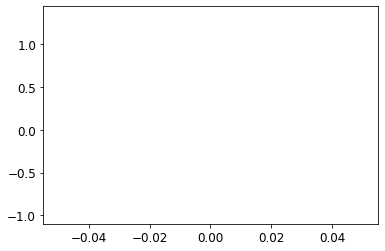

In [21]:
plt.plot(dataset.iloc[:1,:])

### Plot dataset

In [11]:
dataset.iloc[-5:,:].apply(pd.DataFrame.describe, axis =1)

,count,mean,std,min,25%,50%,75%,max
144,39512.0,1.990383,0.607220,1.0,2.0,2.0,2.0,3.0
145,39512.0,1.986080,0.691340,1.0,2.0,2.0,2.0,3.0
146,39512.0,1.979196,0.742504,1.0,1.0,2.0,3.0,3.0
147,39512.0,1.974514,0.805962,1.0,1.0,2.0,3.0,3.0
148,39512.0,1.964340,0.879848,1.0,1.0,2.0,3.0,3.0


In [12]:
dataset_max = dataset.apply(pd.DataFrame.max, axis = 1)

#### Max

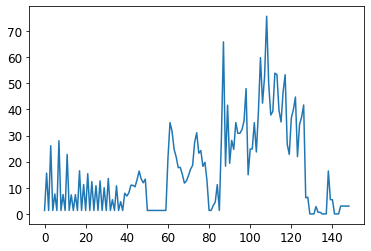

In [13]:
plt.plot(dataset_max.values)

#### Min


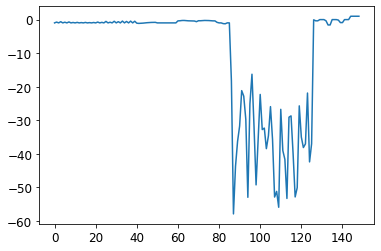

In [14]:
plt.plot(dataset.apply(pd.DataFrame.min, axis =1 ))

#### StDev

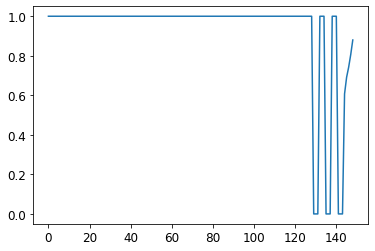

In [15]:
plt.plot(dataset.apply(pd.DataFrame.std, axis = 1))

#### Mean


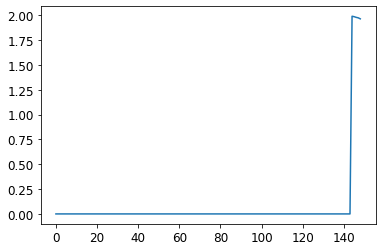

In [16]:
plt.plot(dataset.apply(pd.DataFrame.mean, axis = 1))

#### Median


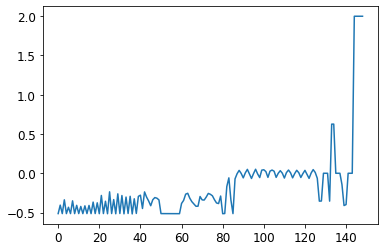

In [17]:
plt.plot(dataset.apply(pd.DataFrame.median, axis =1))

### Preprocessing not required

Since the dataset has already been normalised, no further processing is required.


## Model

https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170601153214969115


The given files contain both the feature set and the labels. From row 1 to row 144 we provide the features (see 'Benchmark Dataset for Mid-Price Prediction of Limit Order Book Data' for the description) and from row 145 to row 149 we provide labels for 5 classification problems. Labels (row 145 to the end) have the following explanation ‘1’ is for up-movement, ‘2’ is for stationary condition and ‘3’ is for down-movement.
 

Ntakaris et al. 2018: "Benchmark dataset for mid-price forecasting of limit order book data with machine learning methods"

We formulated five classification tasks based on mid-price movement predictions for 1, 2, 3, 5, and 10 predicted horizons.


Ntakaris et al. 2018. page 9:

Our labels describe the percentage change of the mid-price, which is calculated as follows:

[formula]

where $m_j$ is the future mid-price (k = 1, 2, 3, 5, or 10 next events in our representations) and $m_i$ is the current mid-price. The extracted labels are based on a threshold for the percentage change of 0.002. For percentage changes equal to or greater than 0.002, we use label 1. For percentage change that varies from −0.00199 to 0.00199, we use label 2, and, for percentage change smaller or equal to −0.002, we use label 3.

+- 0.2 bps is unchanged.


#### Dataset description

In [18]:
dataset.shape

(149, 39512)

In [19]:
X_train = dataset.iloc[:144, :20000]

In [20]:
X_valid = dataset.iloc[:144, 20000:]

In [21]:
y_train = dataset.iloc[-5, :20000]

In [22]:
y_valid = dataset.iloc[-5, 20000:]

In [85]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(20000, 144, 1)
(19512, 144, 1)
(20000, 1)
(19512, 1)


In [27]:
y_train = np.asarray(y_train)

In [28]:
X_train = np.asarray(X_train)

In [29]:
y_valid = np.asarray(y_valid)

In [30]:
X_valid = np.asarray(X_valid)

In [31]:
X_valid = X_valid.transpose()
y_valid = y_valid.transpose()
X_train = X_train.transpose()
y_train = y_train.transpose()


In [32]:
print(X_valid.shape)
print(y_valid.shape)
print(X_train.shape)
print(y_train.shape)

(19512, 144)
(19512,)
(20000, 144)
(20000,)


In [33]:
print(type(X_valid))
print(type(y_valid))
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Helper functions

In [41]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [46]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])



### Estimate model

In [86]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu"))



In [87]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])

In [88]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 19512 samples
Epoch 1/10
   32/20000 [..............................] - ETA: 20s

ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 144, 300)).

In [44]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 625,
 'samples': 20000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [35]:
model.evaluate(X_valid, y_valid)

19512/19512 [==============================] - 1s 28us/sample - loss: 13.6416 - accuracy: 0.1685


[13.641637155099598, 0.16846043]

In [52]:
y_valid[0]

2.0

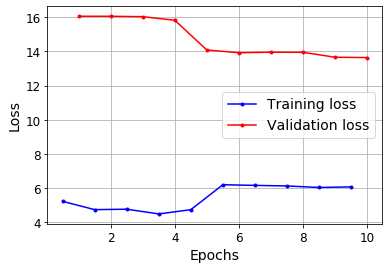

In [42]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

NameError: name 'n_steps' is not defined

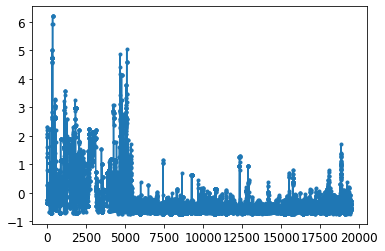

In [53]:
y_pred = model.predict(X_valid)
plot_series(X_valid[:, 1], y_valid[:])
plt.show()


#### Simple RNN

In [55]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
])

In [84]:
print(X_train.shape)
print(y_train.shape)

(20000, 144, 1)
(20000, 1)


In [73]:
X_train = X_train.reshape(20000, 144, 1)

In [76]:
y_train = y_train.reshape(20000,1)

In [83]:
print(X_valid.shape)
print(y_valid.shape)

(19512, 144, 1)
(19512, 1)


In [80]:
X_valid = X_valid.reshape(19512,144,1)
y_valid = y_valid.reshape(19512,1)

In [81]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 19512 samples
Epoch 1/5
   32/20000 [..............................] - ETA: 2:40

ValueError: Dimensions must be equal, but are 144 and 32 for '{{node loss/simple_rnn_3_loss/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_2/simple_rnn_3/transpose_1, Cast_1)' with input shapes: [32,144,20], [32,1].

In [80]:
X_train.shape

(200000, 140, 1)

In [79]:
X_train = X_train.reshape(200000, 140, 1)

In [86]:
y_train.shape

(200000, 1)

In [85]:
y_train = y_train.reshape(200000, 1)

In [87]:
X_valid.shape

(110228, 140)

In [70]:
X_valid = X_valid.reshape(110228, 140, 1)

ValueError: cannot reshape array of size 2809728 into shape (110228,140,1)

In [92]:
y_valid.shape

(1, 110228)

In [93]:
y_valid = y_valid.reshape(110228,1)

## LSTM

In [90]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])


In [95]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(20000, 144, 1)
(20000, 1)
(19512, 144, 1)
(19512, 1)


#### One LSTM layer

In [103]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

In [104]:
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 19512 samples
Epoch 1/5
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.6850 - last_time_step_mse: 0.6160 - val_loss: 0.4258 - val_last_time_step_mse: 0.3310
Epoch 2/5
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.4427 - last_time_step_mse: 0.4085 - val_loss: 0.3920 - val_last_time_step_mse: 0.3334
Epoch 3/5
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.4279 - last_time_step_mse: 0.4078 - val_loss: 0.3765 - val_last_time_step_mse: 0.3340
Epoch 4/5
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.4206 - last_time_step_mse: 0.4076 - val_loss: 0.3667 - val_last_time_step_mse: 0.3347
Epoch 5/5
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.4159 - last_time_step_mse: 0.4073 - val_loss: 0.3567 - val_last_time_step_mse: 0.3308


In [105]:
model.evaluate(X_valid, y_valid)

19512/19512 [==============================] - 9s 467us/sample - loss: 0.3567 - last_time_step_mse: 0.3308


[0.35672230372459685, 0.3308063]

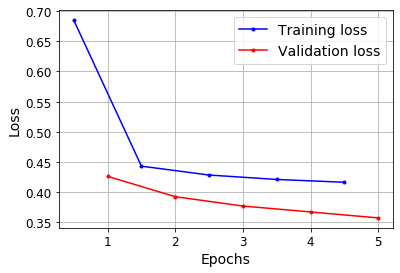

In [106]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

A simple model works OK.


#### two LSTM layers

In [108]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

In [109]:
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))


Train on 20000 samples, validate on 19512 samples
Epoch 1/5
20000/20000 [==============================] - 67s 3ms/sample - loss: 0.5875 - last_time_step_mse: 0.5307 - val_loss: 0.3856 - val_last_time_step_mse: 0.3309
Epoch 2/5
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.4291 - last_time_step_mse: 0.4082 - val_loss: 0.3610 - val_last_time_step_mse: 0.3327
Epoch 3/5
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.4155 - last_time_step_mse: 0.4075 - val_loss: 0.3525 - val_last_time_step_mse: 0.3332
Epoch 4/5
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.4110 - last_time_step_mse: 0.4074 - val_loss: 0.3475 - val_last_time_step_mse: 0.3335
Epoch 5/5
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.4087 - last_time_step_mse: 0.4070 - val_loss: 0.3403 - val_last_time_step_mse: 0.3308


In [110]:
model.evaluate(X_valid, y_valid)

19512/19512 [==============================] - 14s 697us/sample - loss: 0.3403 - last_time_step_mse: 0.3308


[0.3402919402265255, 0.33080637]

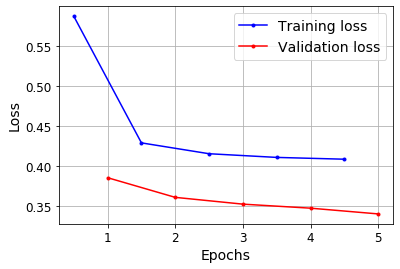

In [111]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

#### Even more layers

In [113]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid))



Train on 20000 samples, validate on 19512 samples
Epoch 1/25
20000/20000 [==============================] - 108s 5ms/sample - loss: 0.5644 - last_time_step_mse: 0.4979 - val_loss: 0.3776 - val_last_time_step_mse: 0.3308
Epoch 2/25
20000/20000 [==============================] - 102s 5ms/sample - loss: 0.4270 - last_time_step_mse: 0.4083 - val_loss: 0.3570 - val_last_time_step_mse: 0.3322
Epoch 3/25
20000/20000 [==============================] - 89s 4ms/sample - loss: 0.4137 - last_time_step_mse: 0.4076 - val_loss: 0.3489 - val_last_time_step_mse: 0.3331
Epoch 4/25
20000/20000 [==============================] - 90s 5ms/sample - loss: 0.4096 - last_time_step_mse: 0.4075 - val_loss: 0.3439 - val_last_time_step_mse: 0.3338
Epoch 5/25
20000/20000 [==============================] - 91s 5ms/sample - loss: 0.4078 - last_time_step_mse: 0.4071 - val_loss: 0.3363 - val_last_time_step_mse: 0.3309
Epoch 6/25
20000/20000 [==============================] - 91s 5ms/sample - loss: 0.4074 - last_time_ste